# Intro

### Imports

In [50]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [51]:
# importing data
housing_df = pd.read_csv("../data/sacramento_real_estate_transactions.csv")
housing_df.head(3)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839


# Cleaning

### Typecasting

In [52]:
# Checking data types of columns
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB
None


In [53]:
# Fixing datatype of "zip"
housing_df["zip"] = housing_df["zip"].astype(str)

# Fixing datatype of "sale_date"
housing_df["sale_date"].str.replace(' EDT', '')
housing_df["sale_date"] = housing_df["sale_date"].apply(pd.to_datetime)

# Output
print(housing_df.info())

c:\Users\chris\anaconda3\envs\PythonData\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     985 non-null    object        
 1   city       985 non-null    object        
 2   zip        985 non-null    object        
 3   state      985 non-null    object        
 4   beds       985 non-null    int64         
 5   baths      985 non-null    int64         
 6   sq__ft     985 non-null    int64         
 7   type       985 non-null    object        
 8   sale_date  985 non-null    datetime64[ns]
 9   price      985 non-null    int64         
 10  latitude   985 non-null    float64       
 11  longitude  985 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 92.5+ KB
None


### Fixing wrong values

In [54]:
# checking states
print(housing_df["state"].value_counts())

# fixing state
housing_df["state"] = housing_df["state"].str.replace("AC", "CA")
print(housing_df["state"].value_counts())

CA    984
AC      1
Name: state, dtype: int64
CA    985
Name: state, dtype: int64


### Checking nonsensical values

In [55]:
# checking for nonsense values
# assuming there will be rental houses without bed, bathroom (eg. someone renting a shed)
print(housing_df["sq__ft"].value_counts())

# fixing those 0 values
housing_df = housing_df[housing_df["sq__ft"] > 0]

0       171
1120      8
795       6
1039      5
1080      5
       ... 
3192      1
3746      1
2607      1
2016      1
1319      1
Name: sq__ft, Length: 604, dtype: int64


In [56]:
# checking for crazy prices
print(housing_df["price"].value_counts().index.sort_values(ascending=True))

# fixing that crazy $2000 apartment price
housing_df = housing_df[housing_df["price"] >= 30000]
print(housing_df["price"].value_counts().index.sort_values(ascending=True))

Int64Index([  2000,  30000,  40000,  48000,  55422,  56950,  59222,  60000,
             61000,  61500,
            ...
            660000, 668365, 676200, 677048, 680000, 691659, 699000, 760000,
            839000, 884790],
           dtype='int64', length=537)
Int64Index([ 30000,  40000,  48000,  55422,  56950,  59222,  60000,  61000,
             61500,  62000,
            ...
            660000, 668365, 676200, 677048, 680000, 691659, 699000, 760000,
            839000, 884790],
           dtype='int64', length=536)


In [57]:
### Saving cleaned dataset

In [58]:
# Saving clean dataset
housing_df.to_csv('../data/sacramento_cleaned_dataframe.csv', index=False)

# EDA

Thinking out loud here, I think these variables will predict price
- zipcode
- sale date
- num of beds
- num of baths
- num of sq_ft

In [59]:
# defining custom scatterplot function
def chris_scatterplot(xcol: str) -> None:
    """
    Function:
    return - None: graphs and saves a scatterplots that maps the give xcol to the price

    Keyword Arguments:
    xcol - STR: the name of the column in the dataframe
    """
    # Figure Setup
    plt.figure(figsize=(8, 5))
    plt.title(f"{xcol.replace('_',' ').title()} Predictor of Sacramento Real Estate Prices", size=18)
    plt.ylabel(xcol.replace("_","").title(), size=12)
    plt.xlabel(xcol, size=12)
    plt.grid(alpha=0.25)

    # Figure Graphing
    plt.scatter(housing_df[xcol], housing_df["price"], color="g", alpha=0.5)

    # Outputs    
    plt.tight_layout()
    plt.savefig(f"../repo/screenshots/scatter_{xcol}.png")
    plt.show()
    return

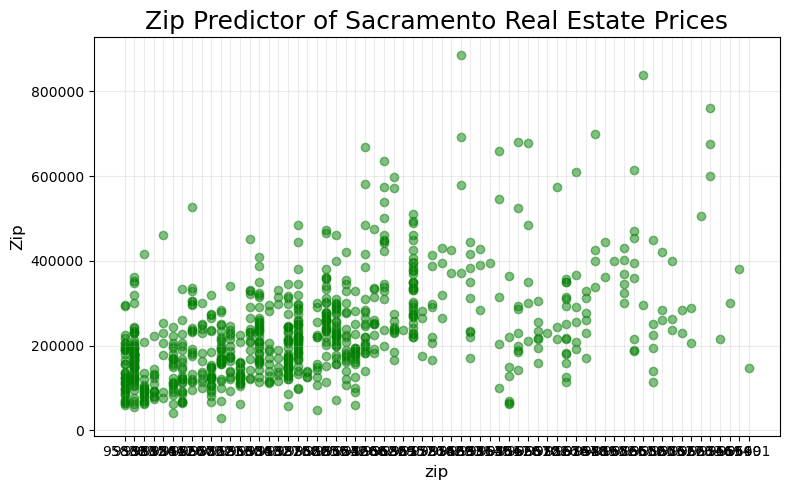

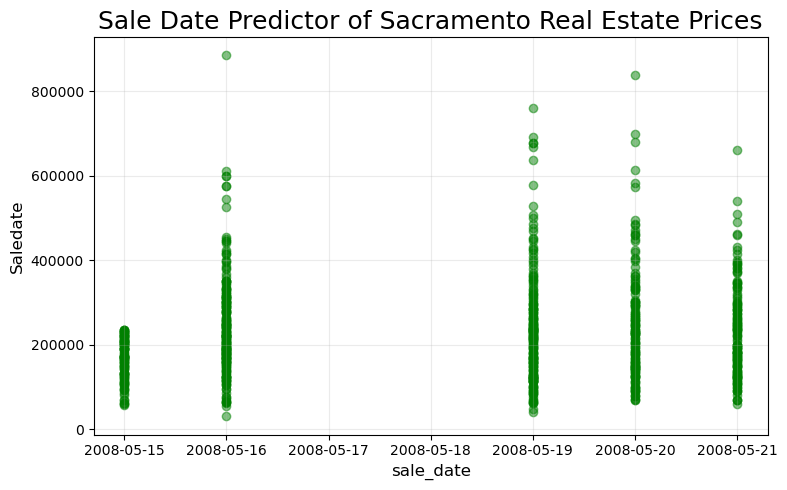

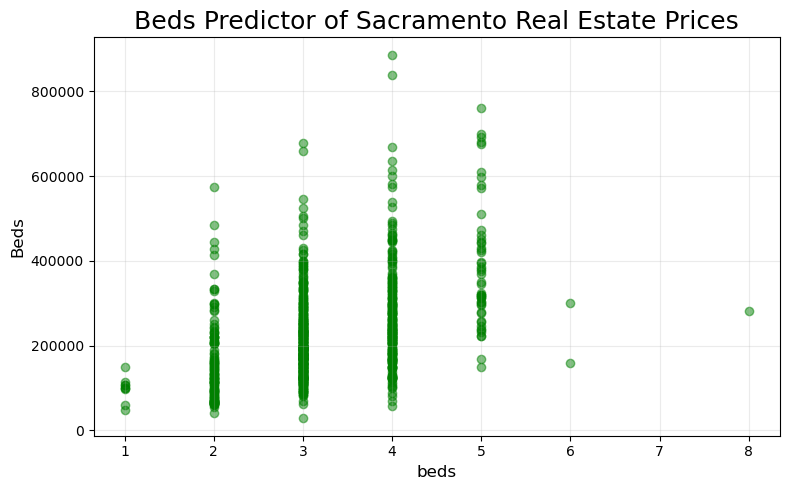

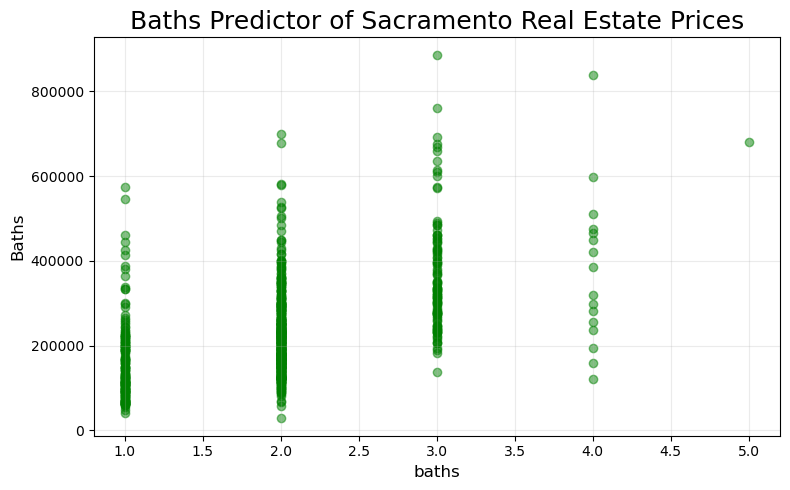

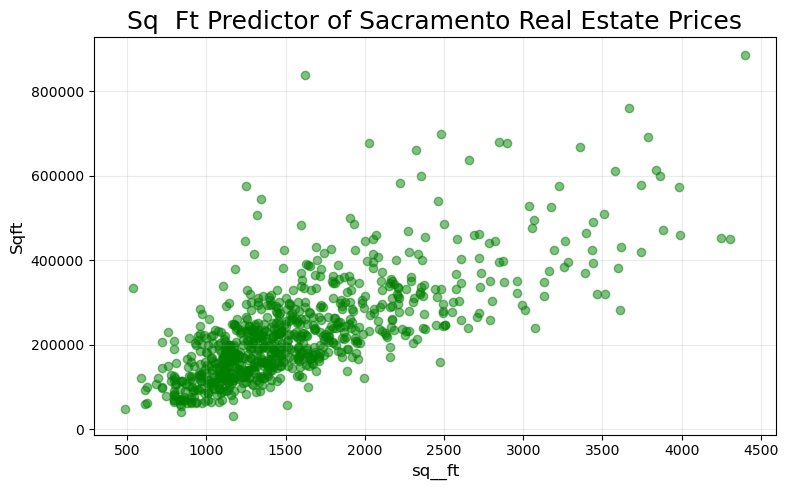

In [60]:
# checking all scatterplots
xcols = ["zip", "sale_date", "beds", "baths", "sq__ft"]
for xcol in xcols:
    chris_scatterplot(xcol)

After checking the scatterplots, I think the best would be square footage, since it shows a much clearer upwards relationship + it has many numeric xvalues.

In [61]:
# defining custom coef function
def chris_coef(x: list, y: list) -> tuple:
    """
    Function:
    return - TUPLE: returns intercept and slope coefficients that minimize SSE of given 2 lists

    Keyword Arguments:
    x - LIST: a given predictor variable
    y - LIST: a given target variable
    """
    coef = stats.pearsonr(x,y)[0] * np.std(y) / np.std(x)
    intercept = np.mean(y) - coef*np.mean(x)
    return (coef, intercept)

In [62]:
# testing function on intercept
chris_coef(housing_df["sq__ft"], housing_df["price"])

(134.7512075418882, 15943.749961489259)

Interpreting my results...
- Slope: For every 1 sq ft increase, we expect to see the price increase by ~$135.
- Intercept: At 0 sq ft, we expect to baseline price to be ~$16k.

Use cases:
- Prediction: As a real estate agent, this model can help you approx. predict what a fair market price of a house that your client is trying to sell.
- Inference: As a real estate economics researcher, this model can you help you evaluate how sq ft of houses has impacted the housing market price over item.

### Plotting residuals

In [65]:
# defining bonus scatterplot function
def chris_bonus_scatterplot(xcol: str) -> None:
    """
    Function:
    return - None: graphs and saves a scatterplots that maps the give xcol to the price

    Keyword Arguments:
    xcol - STR: the name of the column in the dataframe
    """
    # Figure Setup
    plt.figure(figsize=(8, 5))
    plt.title(f"{xcol.replace('_',' ').title()} Predictor of Sacramento Real Estate Prices", size=18)
    plt.ylabel(xcol.replace("_","").title(), size=12)
    plt.xlabel(xcol, size=12)
    plt.grid(alpha=0.25)

    # Calculating Regline
    coef, inter = chris_coef(housing_df[xcol], housing_df["price"])
    y_pred = coef*housing_df[xcol] + inter

    # Figure Graphing
    plt.scatter(housing_df[xcol], housing_df["price"], color="g", alpha=0.5)
    plt.plot(housing_df[xcol], y_pred, color="r")

    # Outputs    
    plt.tight_layout()
    plt.savefig(f"../repo/screenshots/scatter_{xcol}.png")
    plt.show()
    return

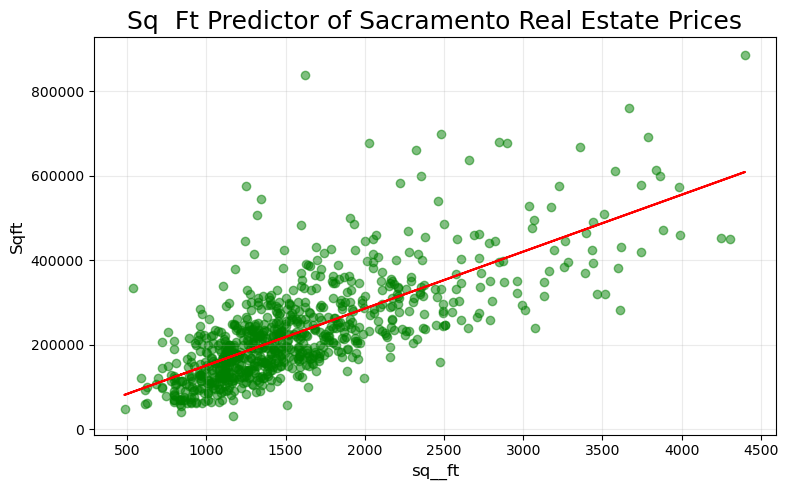

In [66]:
# graphing that scatterplot
chris_bonus_scatterplot("sq__ft")

# MLR Model

In [67]:
housing_df = pd.get_dummies(housing_df, columns=["type"], drop_first=True)

In [68]:
# import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [69]:
X = housing_df[["sq__ft", "beds", "baths", "type_Multi-Family", "type_Residential"]]
y = housing_df["price"]

model = LinearRegression()
model.fit(X, y)
res = pd.Series(model.coef_, index = X.columns)
y_pred = model.predict(X)

In [70]:
print(res)

sq__ft                 152.485309
beds                -26630.650244
baths                 7294.986941
type_Multi-Family   -15497.776789
type_Residential     38532.132802
dtype: float64


### Checking true vs pred

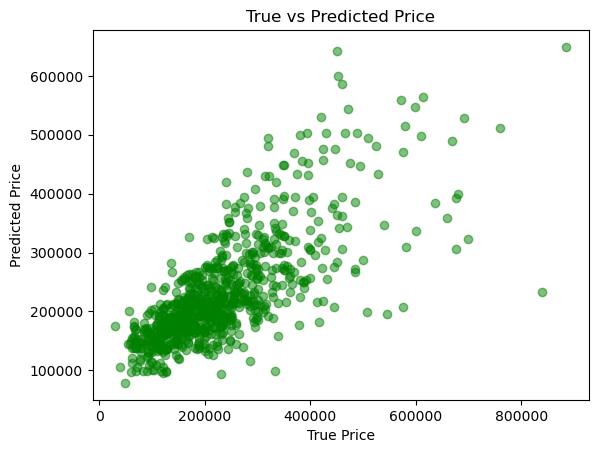

In [71]:
plt.title("True vs Predicted Price")
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.scatter(housing_df["price"], y_pred, color="g", alpha=0.5)
plt.show()

### Checking regression metrics

In [72]:
def r2_adj(model) -> float:
    """ 
    Function:
    return - float: the r2 adjusted score

    Keyword Arguments:
    model - Sklearn.LinearRegression(): the model to be checking
    """
    # source: https://www.statology.org/adjusted-r-squared-in-python/
    num = (1 - model.score(X, y)) * (len(y) - 1)
    den = (len(y) - X.shape[1] - 1)
    return 1 - num/den

In [73]:
# r2
print(model.score(X, y))

# MSE
print(metrics.mean_squared_error(y, y_pred))

# MAE
print(metrics.mean_absolute_error(y, y_pred))

0.5516899128233144
6416046935.861526
57629.148555891865


The model is not great, since only 55% of the variability in our predicted price can be explained by our set of variables (seen above in the list).

### Adjusting Model

In [74]:
X = housing_df[["sq__ft", "beds", "baths"]]
y = housing_df["price"]

model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))

0.5441238929126906


By removing the type of the residence, the model score has decreased slightly to 54% explained

# Conclusion

I think the model is currently underfit / high bias. A high variance model would mean that the first model scored very high, but then on the iteration, the model would then score super low. We got a very similar score with both models, so it's definitely not high variance.